# <필수과제 1>
- simpleimputer (간단한 개념이라 리서치하시고 실제 코드 작성하시고 값에 대해서 결과 정리까지 부탁드립니다. )
- 다양하게 통계치를 지정할 수 있다. ( 평균, 최빈값이 등등 ) 결과가 어떤식으로 바뀌는지 mpg 데이터를 가지고 확인해 주세요!

In [1]:
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
df=sns.load_dataset('mpg')

## What is 'simpleimputer'
- 사이킷런의 SimpleImputer는 데이터 셋의 missing value를 특정한 값으로 채우는 기능을 제공
-  strategy 파라미터의 default는 mean(평균)이고, median(중앙값), most_frequent(최빈값), constant(지정값)을 파라미터로 지정 가능



In [2]:
df_x= df[['cylinders','displacement','horsepower','weight']]
msv=np.random.randint(0,389, size=30)
df_x.iloc[msv] = np.nan
df_sp =pd.concat([df_x ,df['mpg']],axis=1)

C:\Users\qorud\AppData\Local\Temp\ipykernel_20500\236910131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x.iloc[msv] = np.nan


## 1) Strategy=mean

In [3]:
df_sp1 =pd.concat([df_x ,df['mpg']],axis=1)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_sp1 =imp_mean.fit_transform(df_sp1)
df_sp1

array([[   8.,  307.,  130., 3504.,   18.],
       [   8.,  350.,  165., 3693.,   15.],
       [   8.,  318.,  150., 3436.,   18.],
       ...,
       [   4.,  135.,   84., 2295.,   32.],
       [   4.,  120.,   79., 2625.,   28.],
       [   4.,  119.,   82., 2720.,   31.]])

In [4]:
df_sp1= pd.DataFrame(df_sp1)
df_sp1.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [5]:
df_sp1.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']
df_sp1

,cylinders,displacement,horsepower,weight,mpg
0,8.0,307.0,130.0,3504.0,18.0
1,8.0,350.0,165.0,3693.0,15.0
2,8.0,318.0,150.0,3436.0,18.0
3,8.0,304.0,150.0,3433.0,16.0
4,8.0,302.0,140.0,3449.0,17.0
...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,27.0
394,4.0,97.0,52.0,2130.0,44.0
395,4.0,135.0,84.0,2295.0,32.0
396,4.0,120.0,79.0,2625.0,28.0


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_sp1.drop('mpg',axis=1), df_sp1['mpg'],test_size=0.3, random_state=111)

In [7]:
import statsmodels.api as sm #회귀 분석 모듈
import matplotlib.pyplot as plt # 시각화 모듈

In [8]:
fit_train1 = sm.OLS(y_train, x_train) # 회귀분석 진행하기 (다중회귀)
fit_train1 = fit_train1.fit() # 회귀분석 Fit 모델

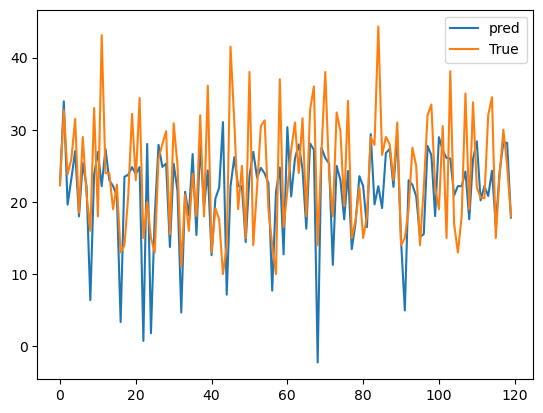

In [9]:
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)

54.27542291024252


## 2) Strategy=median

In [11]:
df_sp2 =pd.concat([df_x ,df['mpg']],axis=1)
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df_sp2 =imp_median.fit_transform(df_sp2)
df_sp2

array([[   8.,  307.,  130., 3504.,   18.],
       [   8.,  350.,  165., 3693.,   15.],
       [   8.,  318.,  150., 3436.,   18.],
       ...,
       [   4.,  135.,   84., 2295.,   32.],
       [   4.,  120.,   79., 2625.,   28.],
       [   4.,  119.,   82., 2720.,   31.]])

In [12]:
df_sp2= pd.DataFrame(df_sp2)
df_sp2.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [13]:
df_sp2.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']
df_sp2

,cylinders,displacement,horsepower,weight,mpg
0,8.0,307.0,130.0,3504.0,18.0
1,8.0,350.0,165.0,3693.0,15.0
2,8.0,318.0,150.0,3436.0,18.0
3,8.0,304.0,150.0,3433.0,16.0
4,8.0,302.0,140.0,3449.0,17.0
...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,27.0
394,4.0,97.0,52.0,2130.0,44.0
395,4.0,135.0,84.0,2295.0,32.0
396,4.0,120.0,79.0,2625.0,28.0


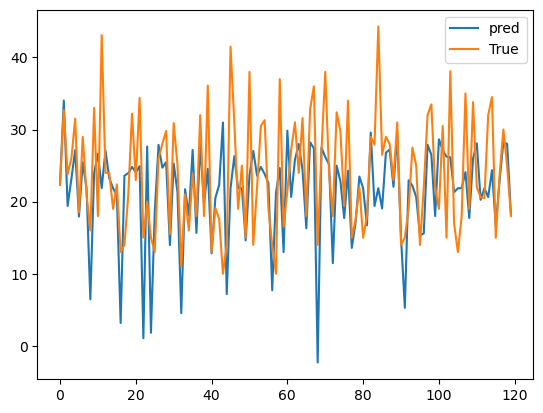

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_sp2.drop('mpg',axis=1), df_sp2['mpg'],test_size=0.3, random_state=111)
fit_train2 = sm.OLS(y_train, x_train) # 회귀분석 진행하기 (다중회귀)
fit_train2 = fit_train2.fit() # 회귀분석 Fit 모델
plt.plot(np.array(fit_train2.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [15]:
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train2.predict(x_test))
print(mse2)

54.249573477967125


## 3) Strategy=most_frequent(최빈수)

In [16]:
df_sp3 =pd.concat([df_x ,df['mpg']],axis=1)
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_sp3 =imp_freq.fit_transform(df_sp3)
df_sp3

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


array([[   8.,  307.,  130., 3504.,   18.],
       [   8.,  350.,  165., 3693.,   15.],
       [   8.,  318.,  150., 3436.,   18.],
       ...,
       [   4.,  135.,   84., 2295.,   32.],
       [   4.,  120.,   79., 2625.,   28.],
       [   4.,  119.,   82., 2720.,   31.]])

In [17]:
df_sp3= pd.DataFrame(df_sp3)
df_sp3.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [18]:
df_sp3.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']
df_sp3

,cylinders,displacement,horsepower,weight,mpg
0,8.0,307.0,130.0,3504.0,18.0
1,8.0,350.0,165.0,3693.0,15.0
2,8.0,318.0,150.0,3436.0,18.0
3,8.0,304.0,150.0,3433.0,16.0
4,8.0,302.0,140.0,3449.0,17.0
...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,27.0
394,4.0,97.0,52.0,2130.0,44.0
395,4.0,135.0,84.0,2295.0,32.0
396,4.0,120.0,79.0,2625.0,28.0


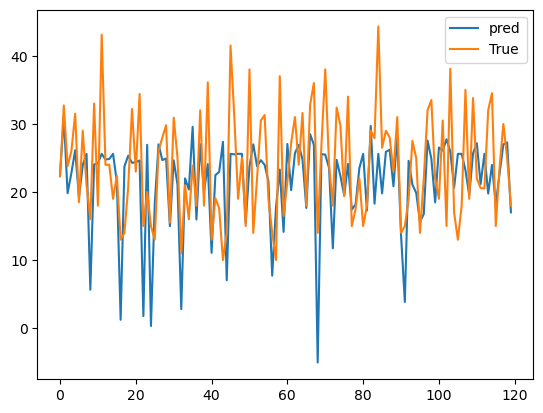

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_sp3.drop('mpg',axis=1), df_sp3['mpg'],test_size=0.3, random_state=111)
fit_train3 = sm.OLS(y_train, x_train) # 회귀분석 진행하기 (다중회귀)
fit_train3 = fit_train3.fit() # 회귀분석 Fit 모델
plt.plot(np.array(fit_train3.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [20]:
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))
print(mse3)

55.16895503956683


## 4) constant

In [21]:
df_sp4 =pd.concat([df_x ,df['mpg']],axis=1)
imp_cons = SimpleImputer(missing_values=np.nan, strategy='constant')
df_sp4 =imp_cons.fit_transform(df_sp4)
df_sp4

array([[   8.,  307.,  130., 3504.,   18.],
       [   8.,  350.,  165., 3693.,   15.],
       [   8.,  318.,  150., 3436.,   18.],
       ...,
       [   4.,  135.,   84., 2295.,   32.],
       [   4.,  120.,   79., 2625.,   28.],
       [   4.,  119.,   82., 2720.,   31.]])

In [22]:
df_sp4= pd.DataFrame(df_sp4)
df_sp4.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [23]:
df_sp4.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']
df_sp4

,cylinders,displacement,horsepower,weight,mpg
0,8.0,307.0,130.0,3504.0,18.0
1,8.0,350.0,165.0,3693.0,15.0
2,8.0,318.0,150.0,3436.0,18.0
3,8.0,304.0,150.0,3433.0,16.0
4,8.0,302.0,140.0,3449.0,17.0
...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,27.0
394,4.0,97.0,52.0,2130.0,44.0
395,4.0,135.0,84.0,2295.0,32.0
396,4.0,120.0,79.0,2625.0,28.0


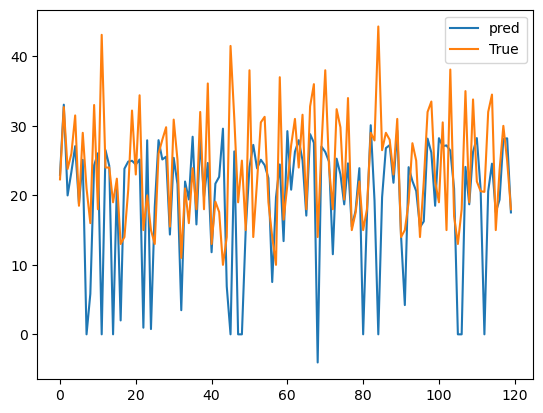

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_sp4.drop('mpg',axis=1), df_sp4['mpg'],test_size=0.3, random_state=111)
fit_train4 = sm.OLS(y_train, x_train) # 회귀분석 진행하기 (다중회귀)
fit_train4 = fit_train4.fit() # 회귀분석 Fit 모델
plt.plot(np.array(fit_train4.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [25]:
mse4 = mean_squared_error(y_true = y_test, y_pred = fit_train4.predict(x_test))
print(mse4)

112.49914995507847


In [26]:
print( 'mean:', mse1)
print( 'median:', mse2)
print( 'frequence:', mse3)
print( 'constant:', mse4)


mean: 54.27542291024252
median: 54.249573477967125
frequence: 55.16895503956683
constant: 112.49914995507847


### 이 결과로 보아 도메인 지식을 제외하더라고 constant 방식은 알맞지 않은 것을 알 수 있다.